# Who are the highest payed NBA players?

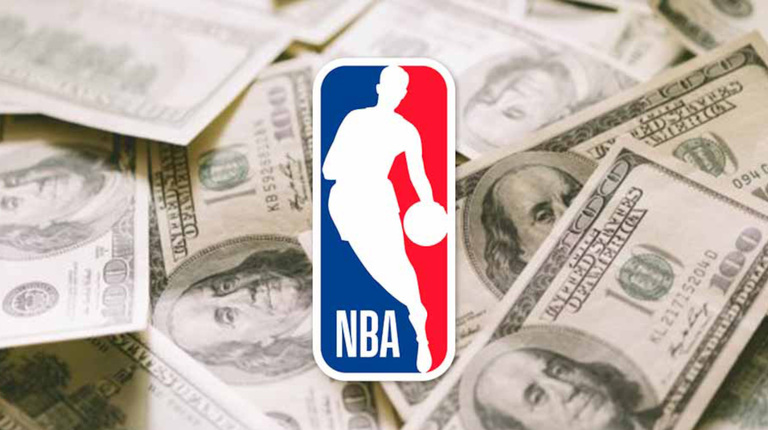

# Introduction 

According to ESPN

# Input 

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

nba_data = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/nba-player-stats-2019.csv')

#Selecting key stats to do calculations
key_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'FT%']
nba_data_selected = nba_data[['Player'] + key_stats].copy()


# Algorithm

In [2]:

#Enter 0 for missing values to avoid errors
nba_data_selected.fillna(0, inplace=True)

#Change key stats to a 0-10 scale
scaler = MinMaxScaler(feature_range=(0, 10))
nba_data_selected[key_stats] = scaler.fit_transform(nba_data_selected[key_stats])

#Weighted sum of the key stats to get player score
weights = {'PTS': 0.4, 'TRB': 0.2, 'AST': 0.2, 'STL': 0.05, 'BLK': 0.05, 'FG%': 0.05, 'FT%': 0.05}
nba_data_selected['Score'] = sum(nba_data_selected[stat] * weight for stat, weight in weights.items())

#Function to search for a player's name and return their score
def get_player_score(player_name):
    result = nba_data_selected[nba_data_selected['Player'].str.contains(player_name, case=False)]
    if not result.empty:
        return result[['Player', 'Score']]
    else:
        return f"'{player_name}' not found in the dataset."



# Result

In [3]:
#Input a player name to search for
while True:   
    player = input('Enter a player name: ')
    print(get_player_score(player))
    finish_session = input("Finish Session? y/n: ")
    if (finish_session == "y"):
        break;

Enter a player name: Michael Jordan
'Michael Jordan' not found in the dataset.
Finish Session? y/n: y


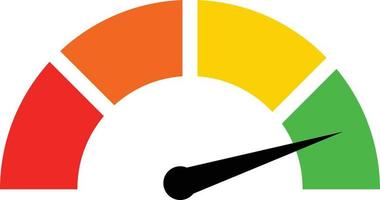

# Conclusion